In [ ]:
pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 737.8 kB/s eta 0:00:00


In [ ]:
import numpy as np        #
import pandas as pd

import matplotlib.pyplot as plt  # data visualization
# %matplotlib inline

# NLTK for natural language processing
import nltk
from nltk.corpus import stopwords

import ftfy
import re


STEP #1: Caricare i dati in una struttura Python adeguata

In [ ]:
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Caricare il dataset via web
df = pd.read_csv('https://zenodo.org/records/4561253/files/WELFake_Dataset.csv', encoding='latin1')

In [ ]:
# Gestire i valori mancanti riempiendo con stringhe vuote
df['title'] = df['title'].fillna('')  # Riempi i valori NaN con stringa vuota
df['text'] = df['text'].fillna('')

# Correggere i caratteri problematici con ftfy solo se il valore è una stringa
df['title'] = df['title'].apply(lambda x: ftfy.fix_text(x) if isinstance(x, str) else x)
df['text'] = df['text'].apply(lambda x: ftfy.fix_text(x) if isinstance(x, str) else x)

# Rimuovere eventuali caratteri non ASCII rimasti
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

df['title'] = df['title'].apply(remove_non_ascii)
df['text'] = df['text'].apply(remove_non_ascii)
# Additional text preprocessing
df['title'] = df['title'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Visualizza i primi risultati per confermare che il testo sia pulito
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA'S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last n...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


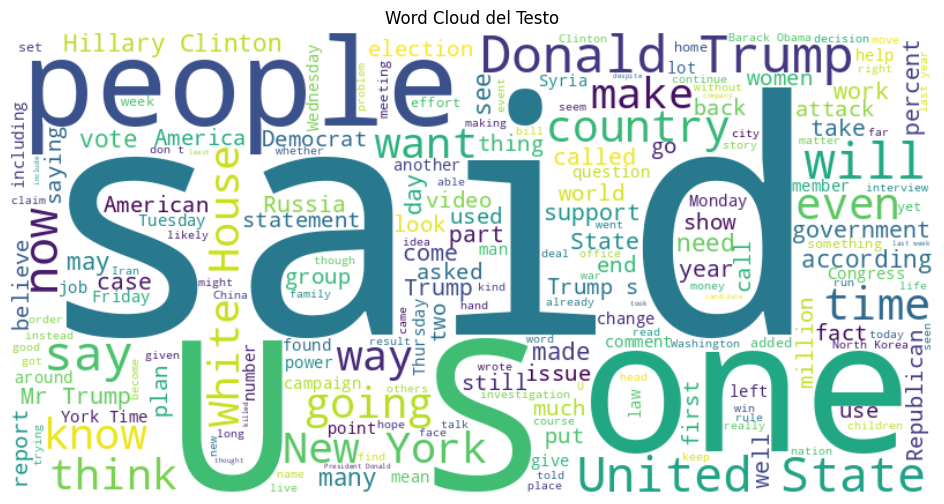

In [ ]:
from wordcloud import WordCloud
# Generate word cloud
# Create combined text feature
df['title_text'] = df['title'] + ' ' + df['text']
text = ' '.join(df['title_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud del Testo')
plt.show()


STEP #2: Investigare il dataset (EDA - Exploratory Data Analysis)

In [ ]:
# Visualizza le prime righe del dataset
df.head()

,Unnamed: 0,title,text,label,title_text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMA'S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last n...",1,UNBELIEVABLE! OBAMA'S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


In [ ]:
#informazioni sul dataset in questione
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       72134 non-null  object
 2   text        72134 non-null  object
 3   label       72134 non-null  int64 
 4   title_text  72134 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.8+ MB


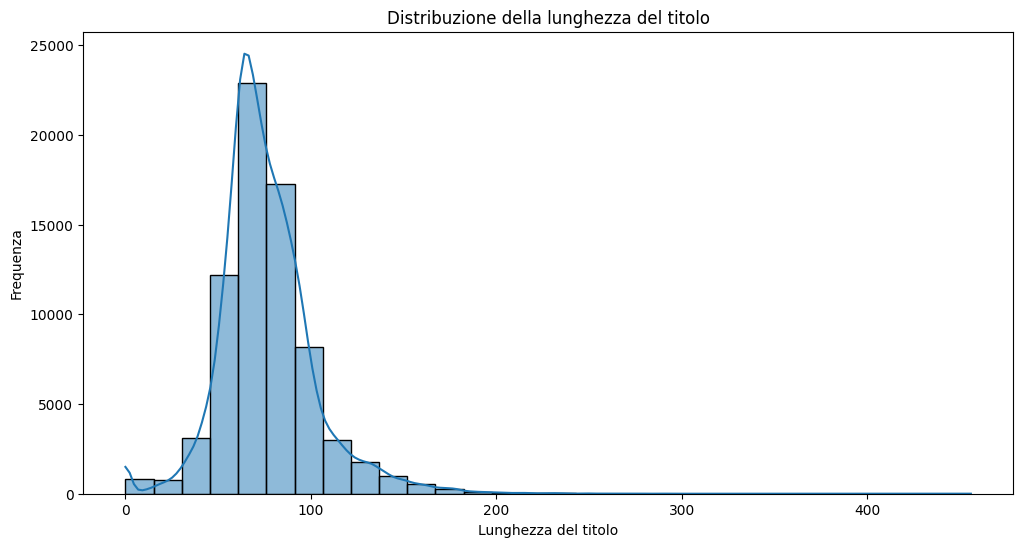

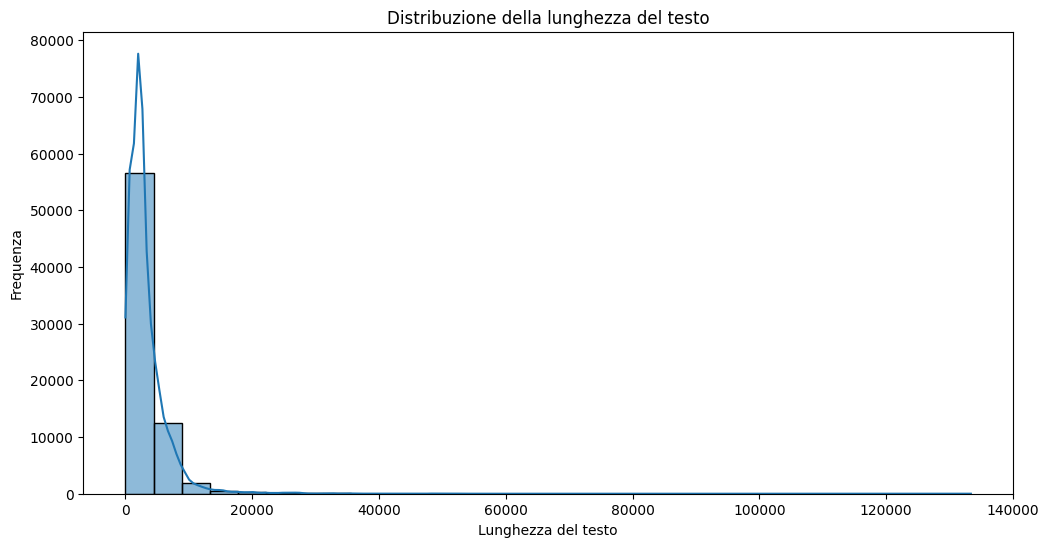

In [ ]:
import seaborn as sns
# Visualizzare la distribuzione della lunghezza dei titoli e dei testi
df['title_len'] = df['title'].apply(lambda x: len(str(x)))
df['text_len'] = df['text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(12, 6))
sns.histplot(df['title_len'], bins=30, kde=True)
plt.title('Distribuzione della lunghezza del titolo')
plt.xlabel('Lunghezza del titolo')
plt.ylabel('Frequenza')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['text_len'], bins=30, kde=True)
plt.title('Distribuzione della lunghezza del testo')
plt.xlabel('Lunghezza del testo')
plt.ylabel('Frequenza')
plt.show()

STEP 3: Data Cleaning
Rimozione duplicati
Trattare i valori mancanti

In [ ]:
# Rimuovi la colonna non necessaria (Unnamed: 0)
df.drop(columns = ['Unnamed: 0'], inplace = True)
# Controllo dei valori mancanti
df.isnull().sum()

,0
title,0
text,0
label,0
title_text,0
title_len,0
text_len,0


In [ ]:
# Rimuovi le righe con valori NaN nelle colonne 'title' o 'text'
df= df.dropna(subset=['title', 'text'])
df.isnull().sum()

,0
title,0
text,0
label,0
title_text,0
title_len,0
text_len,0


In [ ]:

duplicati = df.duplicated().sum()
print(f"Numero di duplicati: {duplicati}")
df = df.drop_duplicates(keep = 'first')
# Rimuovere duplicati
# keep indica quale duplicate mantenere:
# ‘first’ : Drop duplicates except for the first occurrence.
import unicodedata
# Funzione per pulire i testi
def clean_text(text):
    # Normalizzazione Unicode per scomporre caratteri accentati
    text = unicodedata.normalize('NFKD', text)

    # Rimuovere caratteri non alfanumerici (punteggiatura e simboli vari)
    text = re.sub(r'[^\w\s]', '', text)

    # Rimuovere spazi multipli
    text = re.sub(r'\s+', ' ', text)

    # Rimuovere eventuali spazi invisibili (zero-width)
    text = re.sub(r'[\u200b-\u200d]', '', text)

    # Convertire tutto in minuscolo e rimuovere spazi finali/inziali
    return text.lower().strip()

# Applicare la pulizia su entrambe le colonne 'Title' e 'Text'
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)


# Mostrare il numero di righe uniche

df['title'] = df['title'].str.strip().str.lower()
df['text'] = df['text'].str.strip().str.lower()
df = df.drop_duplicates(subset=['title', 'text'], keep='first')
df = df[(df['title'] != '') & (df['text'] != '')]  # Rimuove le righe con stringhe vuote

# Mostrare il numero di righe uniche
print(f"Numero di righe uniche: {len(df)}")

Numero di duplicati: 8461
Numero di righe uniche: 62417


In [ ]:
# Conferma delle dimensioni del dataset dopo la pulizia
df.shape

(62417, 6)

In [ ]:
# ratio fake/no fake

# value_counts() ritorna una Series che contiene quante volte appare un certo valore,
# ordinato per numero di occorrenze decrescenti.
values = df['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) * 100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 55.704375410545204
percentage of 1 : 44.295624589454796


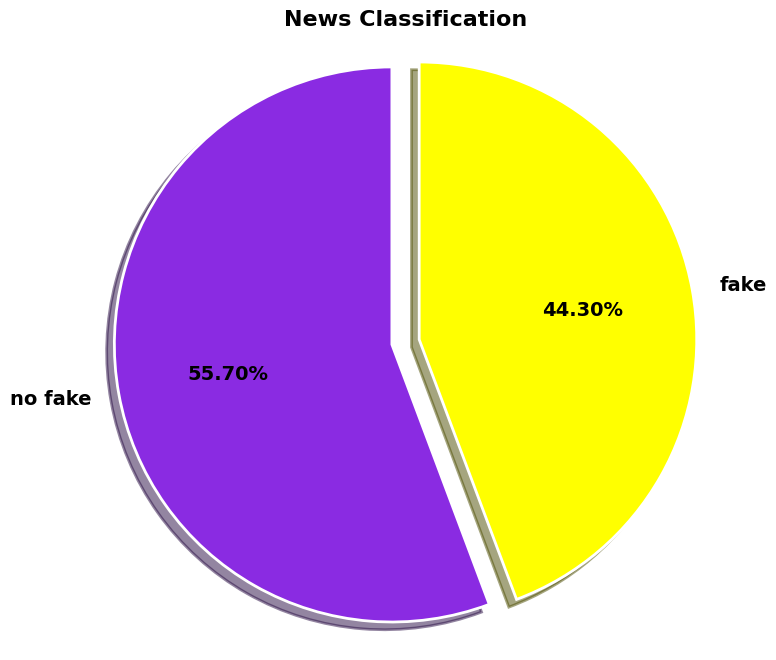

In [ ]:
# creiamo un semplice grafico a torta con pie() di matplotlib

import matplotlib.pyplot as plt


# Define custom colors
colors = ['#8A2BE2', '#FFFF00']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['no fake', 'fake'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('News Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

Il dataset è abbastanza bilanciato

In [ ]:
# Creazione di una nuova colonna combinata 'title+text'
df['title_text'] = df['title'] + ' ' + df['text']

# Verifica dei primi dati puliti
print("\nPrime righe del dataset pulito:")
df.head()


Prime righe del dataset pulito:


,title,text,label,title_text,title_len,text_len
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,law enforcement on high alert following threat...,130,4979
2,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last ni...,1,unbelievable obamas attorney general says most...,136,212
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0,bobby jindal raised hindu uses story of christ...,105,7974
4,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1,satan 2 russia unvelis an image of its terrify...,93,1911
5,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1,about time christian group sues amazon and spl...,78,1519


Identificazione Outliers

In [ ]:
# Funzione per identificare outliers utilizzando l'IQR
#L'IQR è la differenza tra il 75° percentile e il 25° percentile.

def identify_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


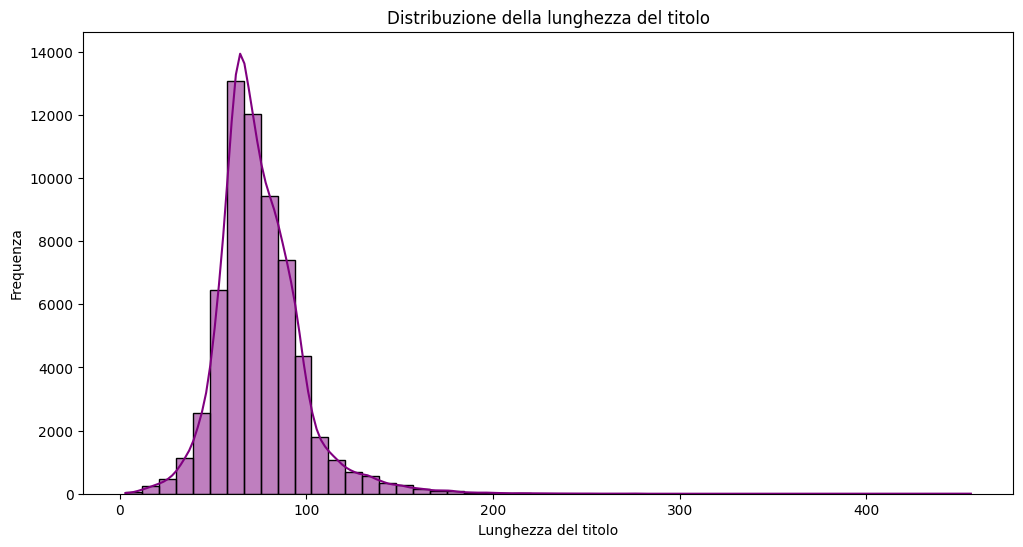

In [ ]:
# Analizzare la distribuzione della lunghezza del titolo e del testo
plt.figure(figsize=(12, 6))
sns.histplot(df['title_len'], bins=50, kde=True, color='purple')
plt.title('Distribuzione della lunghezza del titolo')
plt.xlabel('Lunghezza del titolo')
plt.ylabel('Frequenza')
plt.show()

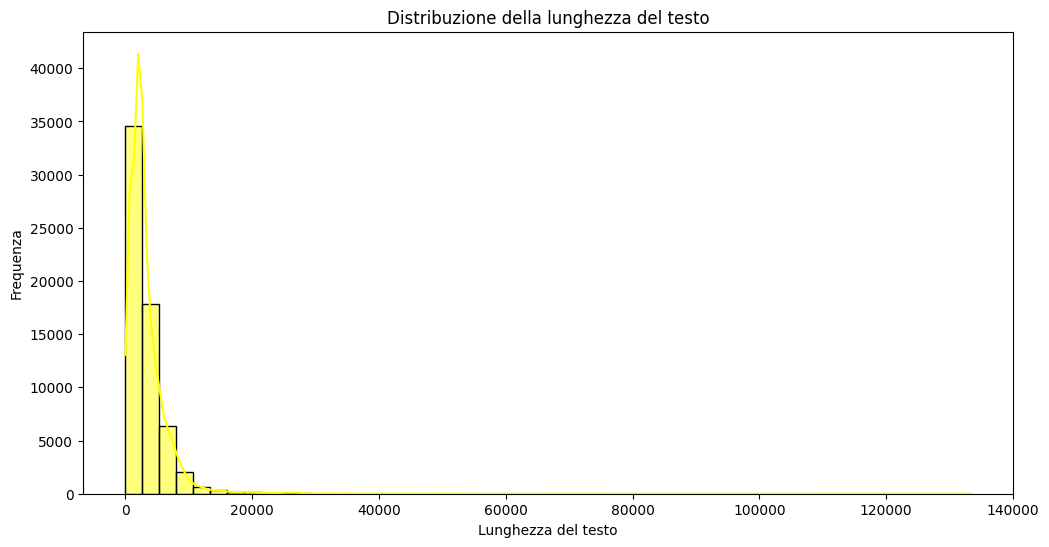

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['text_len'], bins=50, kde=True, color='yellow')
plt.title('Distribuzione della lunghezza del testo')
plt.xlabel('Lunghezza del testo')
plt.ylabel('Frequenza')
plt.show()

<ipython-input-20-7b1cc2f7dfc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='title_len', data=df, palette=['purple', 'yellow'])


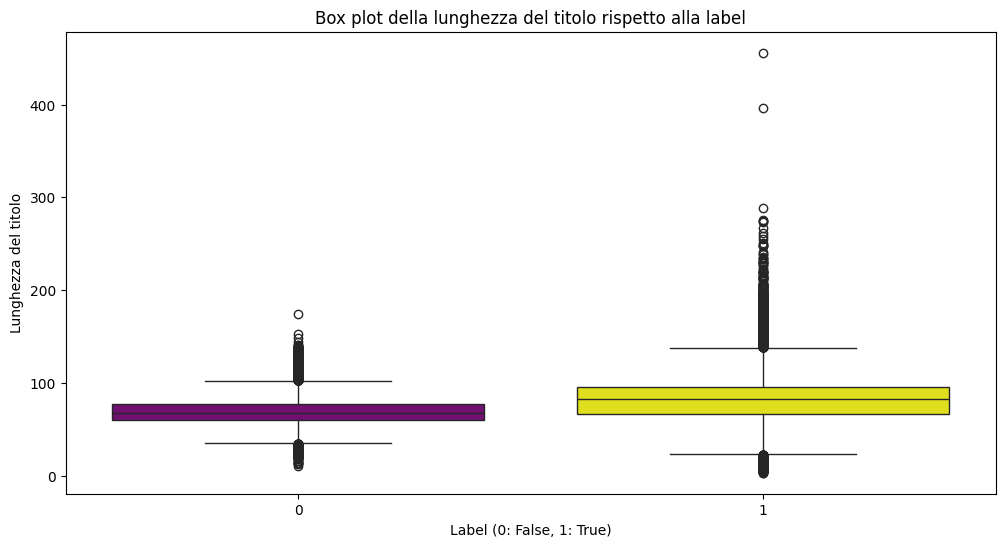

In [ ]:
# Box plot per la lunghezza del titolo e del testo
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='title_len', data=df, palette=['purple', 'yellow'])
plt.title('Box plot della lunghezza del titolo rispetto alla label')
plt.xlabel('Label (0: False, 1: True)')
plt.ylabel('Lunghezza del titolo')
plt.show()

<ipython-input-21-5035b2f1d7e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_len', data=df, palette=['purple', 'yellow'])


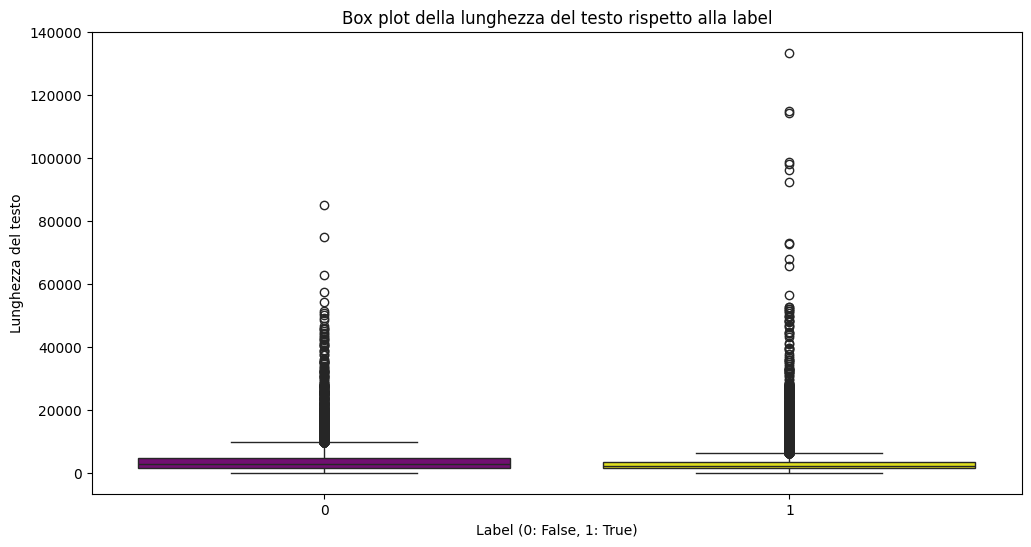

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='text_len', data=df, palette=['purple', 'yellow'])
plt.title('Box plot della lunghezza del testo rispetto alla label')
plt.xlabel('Label (0: False, 1: True)')
plt.ylabel('Lunghezza del testo')
plt.show()

In [ ]:
#  Identificare outliers per la lunghezza del titolo e del testo
outliers_title_len = identify_outliers(df, 'title_len')
outliers_text_len = identify_outliers(df, 'text_len')

print(f"\nNumero di outliers nella lunghezza del titolo: {len(outliers_title_len)}")
print(f"Numero di outliers nella lunghezza del testo: {len(outliers_text_len)}")


Numero di outliers nella lunghezza del titolo: 2417
Numero di outliers nella lunghezza del testo: 3524


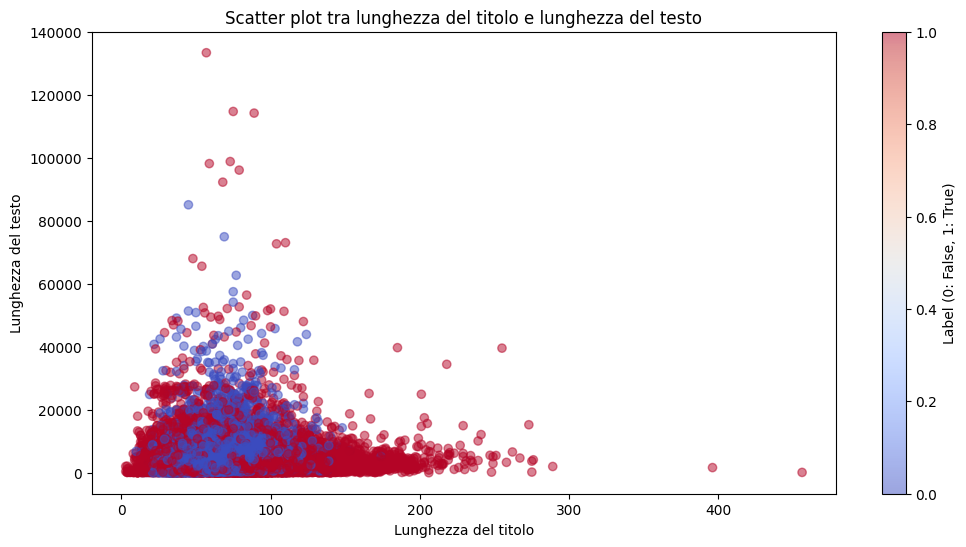

In [ ]:
# Scatter plot per analizzare la distribuzione degli outliers rispetto alla lunghezza
plt.figure(figsize=(12, 6))
plt.scatter(df['title_len'], df['text_len'], c=df['label'], cmap='coolwarm', alpha=0.5)
plt.title('Scatter plot tra lunghezza del titolo e lunghezza del testo')
plt.xlabel('Lunghezza del titolo')
plt.ylabel('Lunghezza del testo')
plt.colorbar(label='Label (0: False, 1: True)')
plt.show()

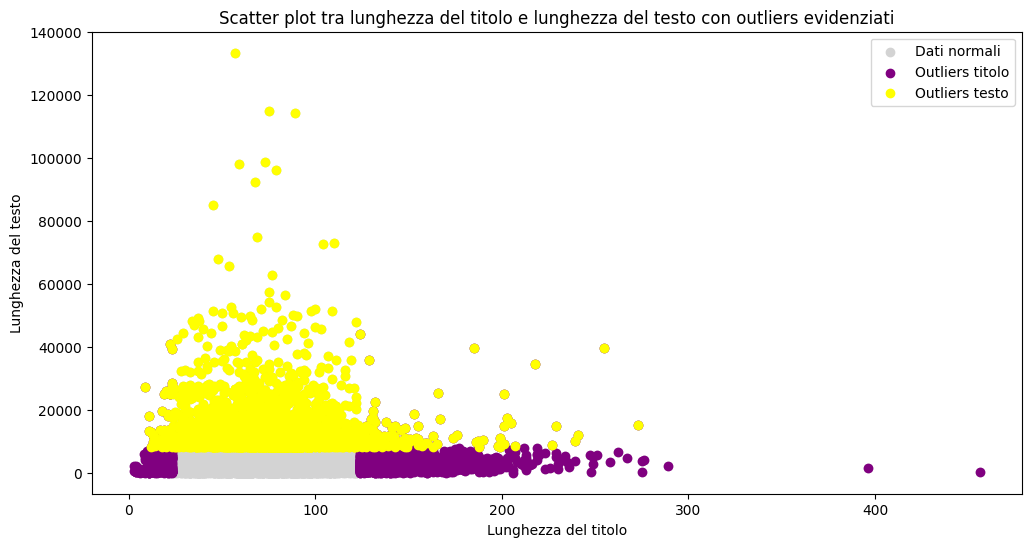

In [ ]:
# Scatter plot con evidenziazione degli outliers
plt.figure(figsize=(12, 6))
plt.scatter(df['title_len'], df['text_len'], c='lightgray', label='Dati normali')
plt.scatter(outliers_title_len['title_len'], outliers_title_len['text_len'], c='purple', label='Outliers titolo')
plt.scatter(outliers_text_len['title_len'], outliers_text_len['text_len'], c='yellow', label='Outliers testo')
plt.title('Scatter plot tra lunghezza del titolo e lunghezza del testo con outliers evidenziati')
plt.xlabel('Lunghezza del titolo')
plt.ylabel('Lunghezza del testo')
plt.legend()
plt.show()


# Elimina gli outliers
#df_cleaned = df[(df['feature'] >= lower_bound) & (df['feature'] <= upper_bound)]

Analisi Ulteriori:
- verificare se la presenza degli outlier influenza negativamente le metriche di performance del modello. Proveremo ad addestrare il modello con e senza outlier.
- Definire una soglia di taglio. Rimuovere i testi oltre una certa lunghezza (es. 10.000 caratteri) o i titoli con oltre 150 caratteri.


STEP #4: Feature engineering

Scegliere le features in input al modello
Scegliere la rappresentazione adatta per una feature (model-dependent)
Combinare una o più features (model-dependent) feature scaling, nel caso si impieghino particolari modelli



In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))  # Converte in un set (iterabile)

# Preprocessing del testo
# Funzione per pulire il testo: rimozione punteggiatura, minuscole, rimozione stopwords
def preprocess_text(text):
    # Conversione in minuscolo
    text = text.lower()

    # Rimozione punteggiatura
    text = re.sub(r'[^\w\s]', '', text)

    # Rimozione stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Uso corretto di stop_words

    return text

In [ ]:
# Applicazione del preprocessing ai testi combinati (title + text)
df['title_text'] = df['title_text'].apply(preprocess_text)  # Preprocessing
df.head()

,title,text,label,title_text,title_len,text_len
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1,law enforcement high alert following threats c...,130,4979
2,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last ni...,1,unbelievable obamas attorney general says char...,136,212
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0,bobby jindal raised hindu uses story christian...,105,7974
4,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1,satan 2 russia unvelis image terrifying new su...,93,1911
5,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1,time christian group sues amazon splc designat...,78,1519


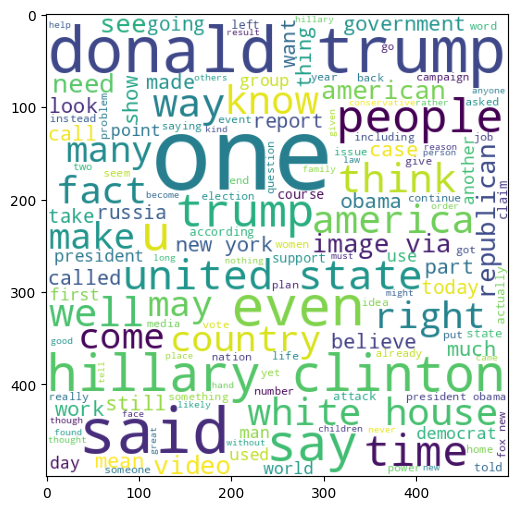

In [ ]:
from wordcloud import WordCloud # text visualization


wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

# fake
# .str di dataframe vettorizza un campo stringa
fake_wc = wc.generate(df[df['label'] == 1]['title_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(fake_wc)
plt.show()

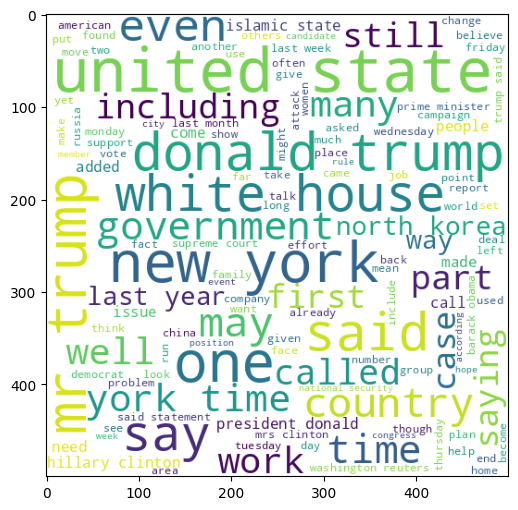

In [ ]:
# no fake
nofake_wc = wc.generate(df[df['label'] == 0]['title_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(nofake_wc)
plt.show()

In [ ]:
fake_carpos = []
for sentence in df[df['label'] == 1]['title_text'].tolist():
    for word in sentence.split():
        fake_carpos.append(word)

Prendiamo i primi 30 token della categoria fake

<ipython-input-30-bc132b33ee46>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


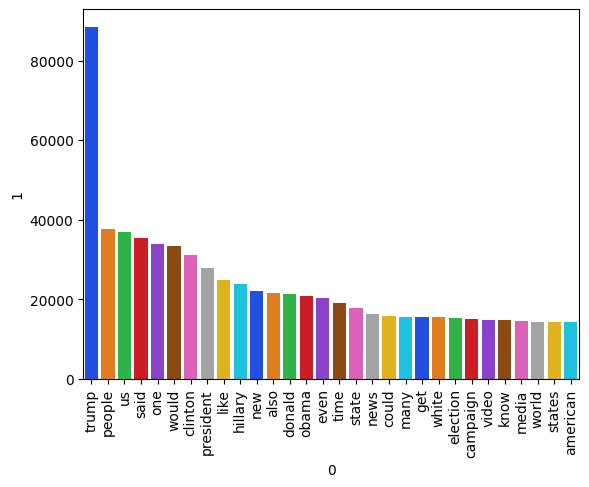

In [ ]:
# most_common() ritorna una lista degli n elementi più ricorrenti
# con associate le frequenze, in formato tupla;
# se n è omesso restituisce tutti gli elementi

# Es. Counter('abracadabra').most_common(3)
# [('a', 5), ('b', 2), ('r', 2)]

from collections import Counter

filter_df = pd.DataFrame(Counter(fake_carpos).most_common(30))
# li visualizziamo con un barplot di seaborn
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

<ipython-input-31-18ea4b437d8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_nofake_df, x = filter_nofake_df[0], y = filter_nofake_df[1], palette = 'cool')


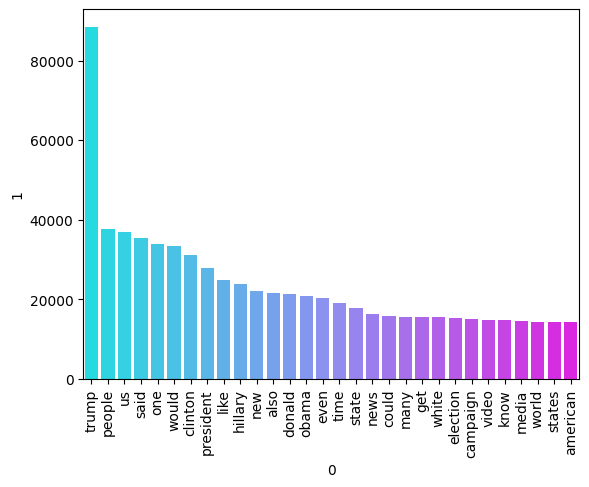

In [ ]:
nofake_carpos = []
for sentence in df[df['label'] == 0]['title_text'].tolist():
    for word in sentence.split():
        nofake_carpos.append(word)
filter_nofake_df = pd.DataFrame(Counter(fake_carpos).most_common(30))
sns.barplot(data = filter_nofake_df, x = filter_nofake_df[0], y = filter_nofake_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

Data preprocessing Dobbiamo assegnare una rappresentazione ai dati testuali.

Rappresentazione usata è tfxidf.

L'analisi può essere effettuata utilizzando una selezione delle caratteristiche basata su termini con frequenze che soddisfano criteri specifici. È possibile condurre l'analisi su tre diverse configurazioni di input semplicemente commentando o decommentando le opzioni necessarie in base alle esigenze:

*   Combinazione di titolo e testo
*   Solo titolo
*   Solo testo





In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
# Rappresentazione del testo con TF-IDF
# Aggiunta delle features numeriche: lunghezza del titolo e del testo

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.1, max_features=10000)
#configurazione in input formata da titolo+testo
X_text_tfidf = tfidf_vectorizer.fit_transform(df['title_text'])
#configurazione in input formata da solo titolo
#X_text_tfidf = tfidf_vectorizer.fit_transform(df['title'])
#configurazione in input formata da solo testo
#X_text_tfidf = tfidf_vectorizer.fit_transform(df['text'])

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()  # Get feature names from the vectorizer
feature_names = list(tfidf_feature_names) + ['title_len', 'text_len']

# Features numeriche (len_title e len_text) - Scaling
scaler = StandardScaler()  # Standardizzazione
X_numeric = df[['title_len', 'text_len']].values  # Estrai le features numeriche
X_numeric_scaled = scaler.fit_transform(X_numeric)  # Scaling delle features numeriche

# Visualizza i nomi delle features
print("TF-IDF Feature Names + Numerical Features:")
print(feature_names)
df.head()
df.shape


TF-IDF Feature Names + Numerical Features:
['10', '20', '2015', '2016', 'able', 'according', 'across', 'act', 'actually', 'added', 'administration', 'ago', 'along', 'already', 'also', 'america', 'american', 'americans', 'among', 'another', 'anything', 'around', 'asked', 'attack', 'away', 'back', 'barack', 'become', 'behind', 'believe', 'best', 'better', 'big', 'bill', 'business', 'call', 'called', 'came', 'campaign', 'candidate', 'case', 'change', 'chief', 'city', 'clear', 'clinton', 'close', 'come', 'comes', 'comment', 'committee', 'congress', 'continue', 'control', 'could', 'countries', 'country', 'course', 'court', 'day', 'days', 'deal', 'decision', 'democratic', 'democrats', 'department', 'despite', 'director', 'donald', 'done', 'dont', 'earlier', 'early', 'election', 'end', 'enough', 'even', 'ever', 'every', 'face', 'fact', 'family', 'far', 'federal', 'find', 'first', 'five', 'following', 'foreign', 'former', 'found', 'four', 'free', 'friday', 'full', 'general', 'get', 'give', 'gi

(62417, 6)

In [ ]:
from scipy.sparse import hstack

# Combinazione delle features TF-IDF e delle features numeriche scalate
X_combined = hstack([X_text_tfidf, X_numeric_scaled])

STEP #5: Suddividere il dataset in training e test (10%) senza shuffle.

In [ ]:
# Importazioni necessarie
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Suddividi i dati in training e test
# Step 11: Divisione dei dati in train/test (90% train, 10% test)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.1, random_state=42)


STEP #6: Istanziare il modello di ML

Scelta del modello in base alle ipotesi fatte sui dati analizzati
Definire una famiglia di iperparametri ragionevoli
Addestramento e predizione

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

STEP #7: Valutazione prestazioni

Accuracy
R2

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# dato un modello, lo addestra, ottiene le predizioni,
# e i relativi valori di accuracy e precision

# Accuracy stima quando il modello è corretto nella sua intereza
# A = correct predictions (è fake?/è no fake?) / all predictions

# Precision stima la correttezza per la classe label
# P = True positive / (True positive + False positive)

# P=1 quando il modello è sempre corretto nel predire la classe target.


def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [ ]:
import time

accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    start = time.time()
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    end = time.time()
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("Execution time (secs): ", end-start)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# può impiegare un po' di tempo...


For:  SVC
Accuracy:  0.6268824094841396
Precision:  0.5788177339901478
Execution time (secs):  1180.2033927440643

For:  KNN
Accuracy:  0.8399551425825056
Precision:  0.7845710627400768
Execution time (secs):  1606.7255327701569

For:  LR
Accuracy:  0.9210189041973726
Precision:  0.9007017543859649
Execution time (secs):  2.7225217819213867

For:  RF
Accuracy:  0.9325536686959308
Precision:  0.9098816979819068
Execution time (secs):  98.14701581001282

For:  Adaboost
Accuracy:  0.9213393143223326
Precision:  0.8990921787709497
Execution time (secs):  45.93174147605896

For:  Bgc
Accuracy:  0.9365587952579302
Precision:  0.9103757325060324
Execution time (secs):  1412.8694236278534

For:  ETC
Accuracy:  0.9189362383851329
Precision:  0.9106690777576854
Execution time (secs):  152.9067578315735

For:  GBDT
Accuracy:  0.9155719320730535
Precision:  0.8836971350613916
Execution time (secs):  107.78302478790283

For:  xgb
Accuracy:  0.9432874078820891
Precision:  0.9228621291448517
Executi